In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import requests

# Carregar os dados dos filmes, avaliações e usuários a partir dos arquivos .dat
# Utiliza-se o separador '::' e o parâmetro 'engine="python"' para garantir que o pandas consiga lidar com o delimitador específico
movies_df = pd.read_csv('./movie-lens-1m/movies.dat', delimiter='::', engine='python', header=None, names=['MovieId', 'Title', 'Genres'], encoding='latin1')
ratings_df = pd.read_csv('./movie-lens-1m/ratings.dat', delimiter='::', engine='python', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp'], encoding='latin1')
users_df = pd.read_csv('./movie-lens-1m/users.dat', delimiter='::', engine='python', header=None, names=['UserId', 'Gender','AgeRange', 'Occupation', 'Zip'], encoding='latin1')

# Função para extrair o ano do título do filme e limpar o título (remover o ano entre parênteses)
def extract_year_and_clean_title(title_with_year):
    # Extrair o ano (os últimos 5 caracteres são " (YYYY)")
    year = int(title_with_year[-5:-1])
    # Remover os últimos 6 caracteres do título (inclui espaço e parênteses do ano)
    cleaned_title = title_with_year[:-6]
    return year, cleaned_title

# Aplicar a função 'extract_year_and_clean_title' na coluna 'Title' para obter o ano e o título limpo
# A função 'apply' é usada para aplicar a função em cada valor da coluna 'Title', e o retorno é dividido em duas colunas ('ReleasedYear' e 'CleanedTitle')
movies_df[['ReleasedYear', 'CleanedTitle']] = movies_df['Title'].apply(
    lambda x: pd.Series(extract_year_and_clean_title(x))
)

# Atualizar a coluna 'Title' com o título limpo (sem o ano), se necessário
movies_df['Title'] = movies_df['CleanedTitle']
# Remover a coluna temporária 'CleanedTitle' após a atualização
movies_df.drop(columns=['CleanedTitle'], inplace=True)

# Imprimir uma mensagem indicando o início do processo de criação das colunas binárias para os gêneros
print("Criando colunas binárias para os gêneros...")

# Dividir os gêneros (usando o caractere '|' como delimitador) para identificar todos os gêneros presentes nos filmes
genres_split = movies_df['Genres'].str.split('|')
# Criar um conjunto de gêneros únicos presentes em todos os filmes
unique_genres = set([genre for sublist in genres_split for genre in sublist])

# Para cada gênero único, criar uma nova coluna binária no dataframe
for genre in unique_genres:
    # Se o gênero estiver presente no campo 'Genres', a coluna será 1, caso contrário, 0
    movies_df[genre] = movies_df['Genres'].apply(lambda x: 1 if genre in x else 0)

# Após a criação das colunas binárias, remover a coluna original 'Genres', pois agora os gêneros estão representados por colunas individuais
movies_df.drop(columns=['Genres'], inplace=True)

# Realizar a junção (merge) dos dataframes 'ratings_df' e 'movies_df' com base na coluna 'MovieId'
# Isso cria um novo dataframe com informações de avaliação e filme combinadas
new_df = pd.merge(ratings_df, movies_df, on = 'MovieId')

# Realizar uma segunda junção entre o dataframe combinado (new_df) e o dataframe de usuários (users_df) com base na coluna 'UserId'
# Isso cria o dataframe final (df) que contém informações completas sobre avaliações, filmes e usuários
df = pd.merge(new_df, users_df, on = 'UserId')


Criando colunas binárias para os gêneros...


In [2]:
import pandas as pd
movies_df = pd.read_csv('./movie-lens-1m/movies.dat', delimiter='::', engine='python', header=None, names=['MovieId', 'Title', 'Genres'], encoding='latin1')
ratings_df = pd.read_csv('./movie-lens-1m/ratings.dat', delimiter='::', engine='python', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp'], encoding='latin1')
users_df = pd.read_csv('./movie-lens-1m/users.dat', delimiter='::', engine='python', header=None, names=['UserId', 'Gender','AgeRange', 'Occupation', 'Zip'], encoding='latin1')

In [10]:
print(movies_df.dtypes)
print(ratings_df.dtypes)
print(users_df.dtypes)

MovieId     int64
Title      object
Genres     object
dtype: object
UserId       int64
MovieId      int64
Rating       int64
Timestamp    int64
dtype: object
UserId         int64
Gender        object
AgeRange       int64
Occupation     int64
Zip           object
dtype: object


In [ ]:
import pandas as pd

# Carregar os DataFrames
movies_df = pd.read_csv('./movie-lens-1m/movies-with-comment.dat', delimiter='|', engine='python', encoding='utf-8')
ratings_df = pd.read_csv('./movie-lens-1m/ratings.dat', delimiter='::', engine='python', header=None, names=['UserId', 'MovieId', 'Rating', 'Timestamp'], encoding='latin1')
users_df = pd.read_csv('./movie-lens-1m/users.dat', delimiter='::', engine='python', header=None, names=['UserId', 'Gender','AgeRange', 'Occupation', 'Zip'], encoding='latin1')

# Filtrar movies_df para ter apenas sinopses não nulas e não vazias
movies_df = movies_df[movies_df['Synopsis'].notna() & (movies_df['Synopsis'].str.strip() != "")]

# Obter os MovieId válidos
valid_movie_ids = movies_df['MovieId'].unique()

# Filtrar ratings_df e users_df para conter apenas MovieId válidos
ratings_df = ratings_df[ratings_df['MovieId'].isin(valid_movie_ids)]
users_df = users_df[users_df['UserId'].isin(ratings_df['UserId'].unique())]

# Verificar as primeiras linhas de movies_df
movies_df.head()


,MovieId,Title,ReleasedYear,Western,Crime,Mystery,Romance,Children's,Horror,Drama,...,Thriller,Adventure,War,Musical,Action,Comedy,Documentary,Animation,Synopsis,SentimentScore
0,1,Toy Story,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,"Led by Woody, Andy's toys live happily in his ...",0.477192
1,2,Jumanji,1995,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,As the gang return to Jumanji to rescue one of...,-0.514916
2,3,Grumpier Old Men,1995,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,A family wedding reignites the ancient feud be...,-0.818498
3,4,Waiting to Exhale,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,"Cheated on, mistreated and stepped on, the wom...",-0.968858
4,5,Father of the Bride Part II,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Just when George Banks has recovered from his ...,-0.634570


In [ ]:
movies_with_sinopsis = movies_df

def fetch_synopsis(title):
    url = f"https://api.themoviedb.org/3/search/movie"
    params = {
        'api_key': "API_KEY",
        'query': title,
        'language': 'en-US'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        print(response.json().get('results', []))
        results = response.json().get('results', [])
        if results:
            return results[0].get('overview', None)
    return None

movies_with_sinopsis['Synopsis'] = movies_with_sinopsis['Title'].apply(fetch_synopsis)


In [6]:
movies_df.to_csv(
    './movie-lens-1m/movies-with-comment.dat',
    sep='|',
    index=False,
    header=True,
    encoding='utf-8'  # Alterando para UTF-8
)

print("Arquivo salvo com sucesso usando UTF-8.")



Arquivo salvo com sucesso usando UTF-8.


In [ ]:
# Função para buscar a sinopse de um filme através da API do The Movie Database (TMDb)
def fetch_synopsis(title):
    """
    Busca a sinopse de um filme usando a API do The Movie Database (TMDb).
    
    Parâmetros:
    title (str): O título do filme para o qual a sinopse será buscada.
    
    Retorna:
    str or None: A sinopse do filme se encontrada, ou None caso contrário.
    
    A função realiza uma requisição GET para a API do TMDb para buscar informações sobre o filme
    com o título fornecido. Se a requisição for bem-sucedida e houver resultados, retorna a sinopse
    do primeiro filme encontrado. Caso contrário, retorna None.
    
    Exemplo:
    fetch_synopsis("The Matrix") -> "A computer hacker learns from mysterious rebels about the true nature of his reality..."
    """
    
    # Definindo a URL da API para busca de filmes
    url = f"https://api.themoviedb.org/3/search/movie"
    
    # Parâmetros da requisição, incluindo chave da API e o título do filme
    params = {
        'api_key': "45b79be0f5f7d65f14939f378dec550e",  # Substitua pela sua chave da API
        'query': title,
        'language': 'en-US'
    }
    
    # Enviando a requisição GET para a API
    response = requests.get(url, params=params)
    
    # Se a requisição for bem-sucedida (status code 200)
    if response.status_code == 200:
        # Imprimindo o resultado da API para depuração
        print(response.json().get('results', []))
        
        # Obtendo os resultados da resposta JSON
        results = response.json().get('results', [])
        
        # Se houver resultados, retorna a sinopse do primeiro filme encontrado
        if results:
            return results[0].get('overview', None)
    
    # Se não houver resultados ou erro, retorna None
    return None


Calculando sentimentos com HuggingFace...


C:\Users\Guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Guilh\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [87]:
df.head()

,UserId,MovieId,Rating,Timestamp,Title,ReleasedYear,Western,Crime,Mystery,Romance,...,Gender,AgeRange,Occupation,Zip,UserId_encoded,MovieId_encoded,ReleasedYear_normalized,Rating_normalized,SentimentScore_normalized,Mean_Similarity
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,1975,0,0,0,0,...,F,1,10,48067,0,1084,0.691358,1.00,0.259244,0.186696
1,1,661,3,978302109,James and the Giant Peach,1996,0,0,0,0,...,F,1,10,48067,0,630,0.950617,0.50,0.846919,0.144771
2,1,914,3,978301968,My Fair Lady,1964,0,0,0,1,...,F,1,10,48067,0,838,0.555556,0.50,0.718295,0.098922
3,1,3408,4,978300275,Erin Brockovich,2000,0,0,0,0,...,F,1,10,48067,0,3092,1.000000,0.75,0.985865,0.188404
4,1,2355,5,978824291,"Bug's Life, A",1998,0,0,0,0,...,F,1,10,48067,0,2116,0.975309,1.00,0.814400,0.146802


C:\Users\Guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "recommender_model_with_sentiment_and_similarity"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │    302,050 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ movie_embedding     │ (None, 1, 50)     │    179,750 │ movie_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content_input       │ (None, 21)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_user        │ (None, 50)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_movie       │ (None, 50)        │          0 │ movie_embedding[… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content_dense       │ (None, 64)        │      1,408 │ content_input[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_embedd… │ (None, 164)       │          0 │ flatten_user[0][… │
│ (Concatenate)       │                   │            │ flatten_movie[0]… │
│                     │                   │            │ content_dense[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_256 (Dense)   │ (None, 256)       │     42,240 │ concatenate_embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_256      │ (None, 256)       │      1,024 │ dense_256[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_256         │ (None, 256)       │          0 │ batch_norm_256[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_128 (Dense)   │ (None, 128)       │     32,896 │ dropout_256[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense_128[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_64[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat

 Total params: 570,505 (2.18 MB)

 Trainable params: 569,609 (2.17 MB)

 Non-trainable params: 896 (3.50 KB)


Visualização do modelo:

Gráficos de métricas de treinamento:
Treinando o modelo...
Epoch 1/50


C:\Users\Guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'movie_input', 'content_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


12355/12355 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - loss: 6.5237 - mae: 1.3082 - val_loss: 1.4887 - val_mae: 0.7645
Epoch 2/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - loss: 1.3336 - mae: 0.7761 - val_loss: 0.9673 - val_mae: 0.7360
Epoch 3/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - loss: 0.9508 - mae: 0.7333 - val_loss: 0.8748 - val_mae: 0.7188
Epoch 4/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - loss: 0.8700 - mae: 0.7195 - val_loss: 0.8331 - val_mae: 0.7089
Epoch 5/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 0.8361 - mae: 0.7120 - val_loss: 0.8182 - val_mae: 0.7087
Epoch 6/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - loss: 0.8137 - mae: 0.7053 - val_loss: 0.8078 - val_mae: 0.6998
Epoch 7/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - loss: 0.8004 - mae: 0.6989 - val_loss: 0.8007 - val_mae: 0.7013
Epoch 8/50
12355/12355 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - loss: 0.7914 - mae: 0.6955 - val_loss: 0.7954 - val_mae: 0.6988
Epoch 9/50
12355/12355 ━━━━

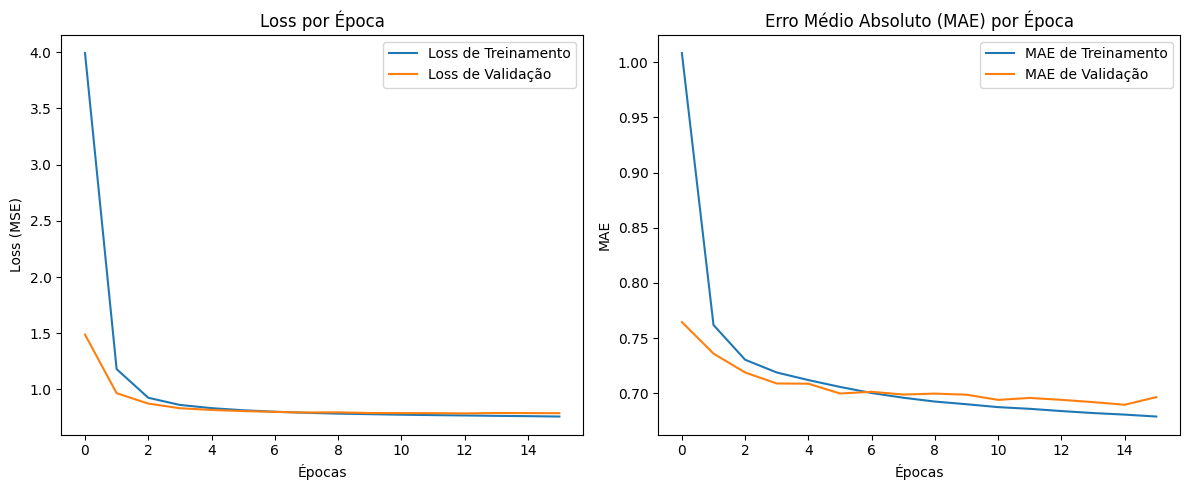

Treinamento concluído.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Função para carregar os dados de filmes, avaliações e usuários
def load_data():
    """
    Carrega os dados de filmes, avaliações e usuários a partir de arquivos CSV.

    Retorna:
        tuple: DataFrames de filmes, avaliações e usuários, respectivamente.
    """
    try:
        movies_df = pd.read_csv('./movie-lens-1m/movies-with-comment.dat', delimiter='|', engine='python', encoding='utf-8')
        ratings_df = pd.read_csv('./ratings_updated.csv', delimiter=',', engine='python', encoding='utf-8')
        users_df = pd.read_csv('./users_updated.csv', delimiter=',', engine='python', encoding='utf-8')
    except Exception as e:
        print(f"Erro ao carregar dados: {e}")
        return None, None, None
    return movies_df, ratings_df, users_df

# Função para pré-processar os dados, filtrando e normalizando
def preprocess_data(movies_df, ratings_df, users_df):
    """
    Pré-processa os dados, filtrando e normalizando as sinopses de filmes e avaliações.

    Parâmetros:
        movies_df (DataFrame): DataFrame contendo os dados dos filmes.
        ratings_df (DataFrame): DataFrame contendo os dados das avaliações.
        users_df (DataFrame): DataFrame contendo os dados dos usuários.

    Retorna:
        tuple: DataFrame pré-processado, DataFrame de filmes, encoders de usuário e de filme.
    """
    movies_df = movies_df[movies_df['Synopsis'].notna() & (movies_df['Synopsis'].str.strip() != "")]
    valid_movie_ids = ratings_df['MovieId'].unique()
    movies_df = movies_df[movies_df['MovieId'].isin(valid_movie_ids)]
    ratings_df = ratings_df[ratings_df['MovieId'].isin(valid_movie_ids)]
    users_df = users_df[users_df['UserId'].isin(ratings_df['UserId'].unique())]

    new_df = pd.merge(ratings_df, movies_df, on='MovieId')
    df = pd.merge(new_df, users_df, on='UserId')

    user_encoder = LabelEncoder()
    movie_encoder = LabelEncoder()
    df['UserId_encoded'] = user_encoder.fit_transform(df['UserId'])
    df['MovieId_encoded'] = movie_encoder.fit_transform(df['MovieId'])

    np.save('user_encoder_classes.npy', user_encoder.classes_)
    np.save('movie_encoder_classes.npy', movie_encoder.classes_)

    if 'ReleasedYear' in df.columns:
        released_year_min = df['ReleasedYear'].min()
        released_year_max = df['ReleasedYear'].max()
        df['ReleasedYear_normalized'] = (df['ReleasedYear'] - released_year_min) / (released_year_max - released_year_min)
        np.save('scaler_released_year_min_max.npy', [released_year_min, released_year_max])

    if 'SentimentScore' in df.columns:
        sentiment_score_min = df['SentimentScore'].min()
        sentiment_score_max = df['SentimentScore'].max()
        df['SentimentScore_normalized'] = (df['SentimentScore'] - sentiment_score_min) / (sentiment_score_max - sentiment_score_min)
        np.save('scaler_sentiment_score_min_max.npy', [sentiment_score_min, sentiment_score_max])

    return df, movies_df, user_encoder, movie_encoder

# Função para gerar embeddings das sinopses dos filmes usando SentenceTransformer
def generate_embeddings(movies_df):
    """
    Gera embeddings das sinopses dos filmes usando SentenceTransformer.

    Parâmetros:
        movies_df (DataFrame): DataFrame contendo os dados dos filmes.

    Retorna:
        DataFrame: DataFrame dos filmes com a média de similaridade adicionada.
    """
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embeddings = model.encode(movies_df['Synopsis'].dropna().tolist())
    similarity_matrix = cosine_similarity(embeddings)
    similarity_mean = similarity_matrix.mean(axis=1)
    movies_df['Mean_Similarity'] = similarity_mean
    return movies_df

# Função para garantir que todos os filmes e usuários com avaliações estejam presentes no conjunto de treinamento
def ensure_all_movies_and_users_in_train(df, user_col, movie_col, test_size=0.2, random_state=42):
    """
    Garante que todos os filmes e usuários com avaliações estejam presentes no conjunto de treinamento.

    Parâmetros:
        df (DataFrame): DataFrame contendo os dados completos.
        user_col (str): Nome da coluna de identificadores de usuário.
        movie_col (str): Nome da coluna de identificadores de filme.
        test_size (float): Proporção dos dados para o conjunto de teste.
        random_state (int): Semente para reprodutibilidade.

    Retorna:
        tuple: DataFrame de treinamento e DataFrame de teste.
    """
    unique_movies = df.groupby(movie_col).first().reset_index()
    unique_users = df.groupby(user_col).first().reset_index()
    unique_df = pd.concat([unique_movies, unique_users]).drop_duplicates()
    remaining_df = df.drop(unique_df.index)
    train_remaining, test_set = train_test_split(remaining_df, test_size=test_size, random_state=random_state)
    train_set = pd.concat([train_remaining, unique_df]).drop_duplicates()
    train_set = shuffle(train_set, random_state=random_state)
    return train_set, test_set

# Função para construir e treinar o modelo de recomendação com características de conteúdo
def build_and_train_model(df, content_features):
    """
    Constrói e treina o modelo de recomendação com características de conteúdo.

    Parâmetros:
        df (DataFrame): DataFrame contendo os dados de entrada.
        content_features (list): Lista de características de conteúdo.

    Retorna:
        Model: Modelo de recomendação treinado.
    """
    # Determina o número de usuários e filmes únicos para os embeddings
    num_users = df['UserId_encoded'].nunique()
    num_movies = df['MovieId_encoded'].nunique()
    embedding_dim = 50  # Dimensão dos vetores de embedding

    # Entradas do modelo
    user_input = Input(shape=(1,), name='user_input')  # Entrada para usuários
    movie_input = Input(shape=(1,), name='movie_input')  # Entrada para filmes
    content_input = Input(shape=(len(content_features),), name='content_input')  # Entrada para características de conteúdo

    # Embedding para os IDs dos usuários
    user_embedding = Embedding(num_users, embedding_dim, name='user_embedding')(user_input)
    # Embedding para os IDs dos filmes
    movie_embedding = Embedding(num_movies, embedding_dim, input_length=1, name='movie_embedding')(movie_input)

    # Transformação dos embeddings em vetores planos
    user_vector = Flatten(name='flatten_user')(user_embedding)
    movie_vector = Flatten(name='flatten_movie')(movie_embedding)

    # Camada densa para processar as características de conteúdo
    content_dense = Dense(64, activation='relu', name='content_dense')(content_input)

    # Combinação dos embeddings e características de conteúdo
    x = Concatenate(name='concatenate_embeddings_and_content')([user_vector, movie_vector, content_dense])

    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_256')(x)
    x = BatchNormalization(name='batch_norm_256')(x)
    x = Dropout(0.4, name='dropout_256')(x)

    # Primeira camada oculta densa
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_128')(x)
    # Regularização L2 evita overfitting ao penalizar pesos elevados.
    x = BatchNormalization()(x)  # Normaliza os valores intermediários para acelerar o treinamento e estabilizar o aprendizado.
    x = Dropout(0.4)(x)  # Desativa 40% dos neurônios aleatoriamente para reduzir overfitting.

    # Segunda camada oculta densa
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_64')(x)
    # Regularização L2 aplicada novamente para restringir valores de pesos.
    x = BatchNormalization()(x)  # Normalização contínua para manter estabilidade.
    x = Dropout(0.4)(x)  # Mais dropout para maior robustez contra overfitting.

    # Terceira camada oculta densa
    x = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='dense_32')(x)
    # Diminuindo o número de neurônios para aprender representações mais compactas.

    # Camada de saída
    output = Dense(1, activation='linear', name='output')(x)
    # Saída linear para prever ratings como valores contínuos.

    # Definição do modelo completo
    model = Model(inputs=[user_input, movie_input, content_input], outputs=output, name="recommender_model_with_sentiment_and_similarity")

    # Compilação do modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
    # - Otimizador Adam: ajuste dinâmico da taxa de aprendizado para eficiência.
    # - Função de perda: Mean Squared Error (MSE) mede o erro quadrático entre as previsões e valores reais.
    # - Métrica: Mean Absolute Error (MAE) fornece uma medida interpretável de erro médio absoluto.

    # Resumo do modelo para inspeção
    model.summary()

    # Visualização gráfica do modelo
    print("\nVisualização do modelo:")
    plot_model(
        model, 
        to_file="model_architecture.png", 
        show_shapes=True, 
        show_layer_names=True, 
        dpi=72, 
        expand_nested=True, 
        rankdir='TB'
    )

    # Visualização das métricas de treinamento
    print("\nGráficos de métricas de treinamento:")
    plt.figure(figsize=(12, 5))

    
    return model


# Função para carregar recursos salvos, como o modelo e os encoders
def load_saved_resources():
    """
    Carrega o modelo treinado e os encoders salvos a partir de arquivos.

    Retorna:
        tuple: Modelo, encoders de usuário e de filme, valores mínimos e máximos de ano de lançamento e score de sentimento.
    """
    model = load_model('best_model_with_sentiment_and_similarity.keras')

    user_encoder_classes = np.load('user_encoder_classes.npy')
    movie_encoder_classes = np.load('movie_encoder_classes.npy')
    released_year_min, released_year_max = np.load('scaler_released_year_min_max.npy')
    sentiment_score_min, sentiment_score_max = np.load('scaler_sentiment_score_min_max.npy')

    user_encoder = LabelEncoder()
    user_encoder.classes_ = user_encoder_classes
    movie_encoder = LabelEncoder()
    movie_encoder.classes_ = movie_encoder_classes

    return model, user_encoder, movie_encoder, released_year_min, released_year_max, sentiment_score_min, sentiment_score_max

# Código principal
movies_df, ratings_df, users_df = load_data()

df, movies_df, user_encoder, movie_encoder = preprocess_data(movies_df, ratings_df, users_df)
movies_df = generate_embeddings(movies_df)

# Adicionar a média da similaridade ao DataFrame
df = pd.merge(df, movies_df[['MovieId', 'Mean_Similarity']], on='MovieId', how='left')

# Dividir o dataset em treinamento e teste
train_df, test_df = ensure_all_movies_and_users_in_train(
    df, user_col='UserId_encoded', movie_col='MovieId_encoded', test_size=0.2, random_state=42
)

# Definir as características de conteúdo
content_features = ['ReleasedYear_normalized', 'SentimentScore_normalized'] + [
    'Western', 'Crime', 'Mystery', 'Romance', "Children's", 'Horror', 'Drama', 'Fantasy', 'Sci-Fi',
    'Film-Noir', 'Thriller', 'Adventure', 'War', 'Musical', 'Action', 'Comedy', 'Documentary', 'Animation', 'Mean_Similarity'
]

# Definir as variáveis de entrada para o modelo
X_train_user = train_df['UserId_encoded']
X_test_user = test_df['UserId_encoded']
X_train_movie = train_df['MovieId_encoded']
X_test_movie = test_df['MovieId_encoded']
X_train_content = train_df[content_features].values
X_test_content = test_df[content_features].values
y_train = train_df['Rating'].values
y_test = test_df['Rating'].values

# Construir o modelo
model = build_and_train_model(df, content_features)

# Definir callbacks para treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_model_with_sentiment_and_similarity.keras', save_best_only=True, monitor='val_loss')

print("Treinando o modelo...")
history = model.fit(
    [X_train_user, X_train_movie, X_train_content], y_train,
    validation_data=([X_test_user, X_test_movie, X_test_content], y_test),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de Treinamento')
plt.plot(history.history['val_mae'], label='MAE de Validação')
plt.title('Erro Médio Absoluto (MAE) por Época')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print("Treinamento concluído.")


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

def load_saved_resources():
    """
    Carrega o modelo salvo, os encoders e valores de normalização a partir de arquivos.

    Retorna:
        tuple: Modelo, encoders de usuário e de filme, valores mínimos e máximos de ano de lançamento e score de sentimento.
    """
    model = load_model('best_model_with_sentiment_and_similarity.keras')
    released_year_min, released_year_max = np.load('scaler_released_year_min_max.npy')
    sentiment_score_min, sentiment_score_max = np.load('scaler_sentiment_score_min_max.npy')
    user_encoder_classes = np.load('user_encoder_classes.npy', allow_pickle=True)
    movie_encoder_classes = np.load('movie_encoder_classes.npy', allow_pickle=True)
    user_encoder = LabelEncoder()
    user_encoder.classes_ = user_encoder_classes
    movie_encoder = LabelEncoder()
    movie_encoder.classes_ = movie_encoder_classes
    return model, user_encoder, movie_encoder, released_year_min, released_year_max, sentiment_score_min, sentiment_score_max

def normalize(value, min_val, max_val):
    """
    Normaliza valores manualmente.

    Parâmetros:
        value (float): Valor a ser normalizado.
        min_val (float): Valor mínimo para normalização.
        max_val (float): Valor máximo para normalização.

    Retorna:
        float: Valor normalizado.
    """
    if pd.isna(value):  # Lidando com valores ausentes
        return 0  # Valor padrão para normalização
    return (value - min_val) / (max_val - min_val)

def extract_content_features(movies_df):
    """
    Extrai a lista de colunas usadas como características de conteúdo no modelo.

    Parâmetros:
        movies_df (DataFrame): DataFrame contendo os dados dos filmes.

    Retorna:
        list: Lista de colunas características de conteúdo.
    """
    return [
        'Western', 'Crime', 'Mystery',
        'Romance', "Children's", 'Horror', 'Drama', 'Fantasy', 'Sci-Fi', 'Film-Noir', 'Thriller',
        'Adventure', 'War', 'Musical', 'Action', 'Comedy', 'Documentary', 'Animation', 'Mean_Similarity'
    ]

def predict_ratings_for_unrated_movies(user_id, movies_df, df):
    """
    Prediz as avaliações para filmes ainda não avaliados por um usuário específico.

    Parâmetros:
        user_id (int): Identificador do usuário.
        movies_df (DataFrame): DataFrame contendo os dados dos filmes.
        df (DataFrame): DataFrame contendo as avaliações dos usuários.

    Retorna:
        None
    """
    model, user_encoder, movie_encoder, released_year_min, released_year_max, sentiment_score_min, sentiment_score_max = load_saved_resources()
    rated_movies = df[df['UserId'] == user_id]['MovieId']
    unrated_movies_df = movies_df[~movies_df['MovieId'].isin(rated_movies)]
    content_features_columns = extract_content_features(movies_df)
    predictions = []

    for _, movie_row in unrated_movies_df.iterrows():
        movie_id = movie_row['MovieId']
        released_year = movie_row['ReleasedYear']
        sentiment_score = movie_row.get('SentimentScore', 0)
        released_year_normalized = normalize(released_year, released_year_min, released_year_max)
        sentiment_score_normalized = normalize(sentiment_score, sentiment_score_min, sentiment_score_max)
        content_features = movie_row[content_features_columns].values
        content_input_prepared = np.array([released_year_normalized, sentiment_score_normalized] + content_features.tolist()).reshape(1, -1)
        user_encoded = user_encoder.transform([user_id])[0]
        movie_encoded = movie_encoder.transform([movie_id])[0]
        predicted_rating = model.predict([np.array([user_encoded]), np.array([movie_encoded]), content_input_prepared], verbose=0)[0][0]
        predictions.append((movie_id, predicted_rating, movie_row))

    predictions.sort(key=lambda x: x[1], reverse=True)
    
    genre_top_movies = {genre: [] for genre in movies_df.columns if genre not in ['MovieId', 'Title', 'ReleasedYear', 'SentimentScore', 'Synopsis', 'Mean_Similarity']}

    for movie_id, predicted_rating, movie_row in predictions:
        title = movie_row['Title']
        genres = [col for col in movies_df.columns if col != 'MovieId' and col != 'Title' and col != 'ReleasedYear' and col != 'SentimentScore' and movie_row[col] == 1]
        
        for genre in genres:
            genre_top_movies[genre].append((title, predicted_rating))

    # Lista para armazenar os dados
    genre_data = []

    # Iterar pelos gêneros e filmes
    for genre, movies in genre_top_movies.items():
        # Ordenar os filmes por previsão de classificação e pegar os 5 melhores
        top_5_movies = sorted(movies, key=lambda x: x[1], reverse=True)[:5]
        
        # Adicionar os dados para cada filme na lista
        for title, rating in top_5_movies:
            genre_data.append({'Gênero': genre, 'Título': title, 'Previsão de Classificação': rating})

    # Criar o DataFrame a partir da lista de dicionários
    df_top_movies = pd.DataFrame(genre_data)

    # Exibir o DataFrame
    return df_top_movies

user_id = "6041"  # ID do usuário que você quer recomendar os filmes

# Chama a função para obter o top 5 de filmes para cada gênero

df_top_movies = predict_ratings_for_unrated_movies(user_id, movies_df, df)

df_top_movies[df_top_movies["Gênero"]== "Crime"]


C:\Users\Guilh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'movie_input', 'content_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


,Gênero,Título,Previsão de Classificação
0,Western,Yojimbo,4.492504
1,Western,"Wild Bunch, The",4.409861
2,Western,High Noon,4.408179
3,Western,Butch Cassidy and the Sundance Kid,4.400831
4,Western,Lonely Are the Brave,4.373448


In [4]:
crime_df = df_top_movies[df_top_movies["Gênero"]== "Crime"]

In [5]:
crime_df.head()

,Gênero,Título,Previsão de Classificação
5,Crime,"Godfather, The",4.609735
6,Crime,"Usual Suspects, The",4.589256
7,Crime,Double Indemnity,4.527805
8,Crime,"Sting, The",4.519112
9,Crime,"Godfather: Part II, The",4.500467


In [ ]:
df

In [ ]:
from flask import Flask, render_template, request, redirect, url_for
import pandas as pd
import os

app = Flask(__name__)

# Função para adicionar avaliações
def adicionar_avaliacoes(ratings_df, user_id, avaliacoes):
    for movie_id, rating in avaliacoes.items():
        new_row = {
            'UserId': user_id,
            'MovieId': movie_id,
            'Rating': rating,
            'Timestamp': pd.Timestamp.now().timestamp()
        }
        ratings_df = pd.concat([ratings_df, pd.DataFrame([new_row])], ignore_index=True)
    return ratings_df

@app.route('/')
def home():
    return redirect(url_for('cadastrar_usuario'))

@app.route('/cadastrar', methods=['GET', 'POST'])
def cadastrar_usuario():
    global users_df
    if request.method == 'POST':
        gender = request.form['gender']
        age_range = request.form['age_range']
        occupation = request.form['occupation']
        zip_code = request.form['zip_code']
        new_user_id = users_df['UserId'].max() + 1 if not users_df.empty else 1
        new_row = {'UserId': new_user_id, 'Gender': gender, 'AgeRange': age_range, 'Occupation': occupation, 'Zip': zip_code}
        users_df = pd.concat([users_df, pd.DataFrame([new_row])], ignore_index=True)
        return render_template('usuario_cadastrado.html', user_id=new_user_id)
    return render_template('cadastrar_usuario.html')

@app.route('/avaliar/<int:user_id>', methods=['GET', 'POST'])
def avaliar_filmes(user_id):
    global movies_df, ratings_df
    generos = ['Western', 'Crime', 'Mystery', 'Romance', 'Children\'s', 'Horror', 'Drama', 'Fantasy', 'Sci-Fi', 'Film-Noir', 'Thriller', 'Adventure', 'War', 'Musical', 'Action', 'Comedy', 'Documentary', 'Animation']
    filmes_por_genero = {genero: movies_df[movies_df[genero] == 1][['MovieId', 'Title']].to_dict(orient='records') for genero in generos}
    sucesso = False

    if request.method == 'POST':
        genero_selecionado = request.form.get('genero')
        if genero_selecionado in filmes_por_genero:
            filmes = filmes_por_genero[genero_selecionado]
        else:
            filmes = []

        avaliacoes = {}
        for movie in filmes:
            movie_id = movie['MovieId']
            rating = request.form.get(str(movie_id))
            if rating:
                avaliacoes[movie_id] = int(rating)

        ratings_df = adicionar_avaliacoes(ratings_df, user_id, avaliacoes)
        sucesso = True

    return render_template('avaliar_filmes.html', user_id=user_id, filmes_por_genero=filmes_por_genero, generos=generos, sucesso=sucesso)

@app.route('/finalizar_avaliacoes', methods=['POST'])
def finalizar_avaliacoes():
    ratings_df.to_csv('./ratings_updated.csv', index=False)
    users_df.to_csv('./users_updated.csv', index=False)
    ratings_df.to_csv('./ratings_updated-backup.csv', index=False)
    users_df.to_csv('./users_updated-backup.csv', index=False)
    shutdown_server()
    return 'Aplicação finalizada. As avaliações foram salvas com sucesso.'

def shutdown_server():
    # Finalizando o servidor Flask
    func = request.environ.get('werkzeug.server.shutdown')
    if func:
        func()
    os._exit(0)

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 5000, app, use_reloader=False, use_debugger=True)


NameError: name 'users_df' is not defined

In [ ]:
users_df[users_df[user_id] == 6041]